In [2]:
from init import *
from rootIO import *
import matplotlib

In [3]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=3


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

In [97]:
#_files_dir = '/Users/christianwittweg/geant4_workdir/MuensterTPC-MC/example_spectra_decay0/'
_files_dir = '~/sciebo/0vECEC paper/mc_files_for_0vecec_paper/'
_filename = '_Decay0_Xe124_'
_decayname = '0nukbplus'
_suffix = '.root'
_experiment = 'darwin'

_file = _files_dir + _experiment + _filename + _decayname + _suffix

branches= ['eventid','ed', 'xp', 'yp', 'zp', 'type', 'trackid', 'time', 'parentid','etot']

df = g4root_to_df(_file,branches,1)


~/sciebo/0vECEC paper/mc_files_for_0vecec_paper/darwin_Decay0_Xe124_0nukbplus.root


In [98]:
df.head()

,eventid,ed,xp,yp,zp,type,trackid,time,parentid,etot
0,0,"[4.7747, 27.02531, 0.0, 301.40048, 218.46564, ...","[67.11691, 67.11765, 67.11765, 67.07816, 66.75...","[-1197.5173, -1197.5177, -1197.5177, -1197.251...","[568.7747, 568.7756, 568.7756, 569.0984, 569.4...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, ...","[2.417777e-13, 2.5412544e-13, 2.5412544e-13, 1...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",2856.724365
1,1,"[5.4169, 26.383078, 0.0, 386.1328, 285.85822, ...","[930.458, 930.45905, 930.45905, 931.2166, 931....","[109.507286, 109.5074, 109.5074, 108.900085, 1...","[120.07789, 120.078255, 120.078255, 119.57877,...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.5399908e-12, 1.5520015e-12, 1.5520015e-12, ...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2856.727539
2,2,"[4.7747, 27.025307, 0.0, 340.9652, 424.8372, 3...","[16.198132, 16.199177, 16.199177, 15.830039, 1...","[-559.1618, -559.16156, -559.16156, -559.348, ...","[137.3362, 137.33577, 137.33577, 137.02357, 13...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, ...","[2.5181534e-12, 2.5305012e-12, 2.5305012e-12, ...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",2856.729004
3,3,"[5.4169, 26.383074, 0.0, 133.4461, 202.82507, ...","[43.169277, 43.170105, 43.170105, 42.636044, 4...","[88.40829, 88.40837, 88.40837, 88.59381, 88.63...","[501.8036, 501.80432, 501.80432, 501.11652, 50...","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 8, 8, ...","[3.4839696e-12, 3.4959804e-12, 3.4959804e-12, ...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 6, ...",2856.732178
4,4,"[5.4169, 26.383059, 0.0, 311.71616, 321.21588,...","[1198.4081, 1198.408, 1198.408, 1198.0765, 119...","[-185.70947, -185.709, -185.709, -185.98291, -...","[887.104, 887.10297, 887.10297, 887.6739, 887....","[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', ...","[2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.9396461e-13, 2.0597527e-13, 2.0597527e-13, ...","[0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2856.729492


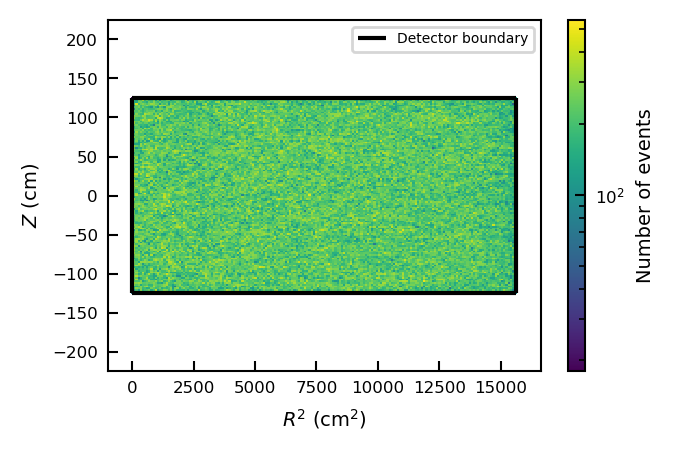

In [99]:
if _experiment == 'nexo':
    zhalf=120/2
    rsquare=60**2
else:
    # DARWIN dimensions are big enough for anything
    zhalf=250/2
    rsquare=125**2
    
xpl=np.divide(np.concatenate(df.xp).tolist(),10)
ypl=np.divide(np.concatenate(df.yp).tolist(),10)
zpl=np.divide(np.concatenate(df.zp).tolist(),10)

plt.hist2d(np.power(xpl,2)+np.power(ypl,2), zpl, bins=(200,200), range=((-1000,rsquare+1000),(-zhalf-100,zhalf+100)), norm=colors.LogNorm(), label='Location of energy depositions')
plt.colorbar(label='Number of events')


    
plt.vlines(0,-zhalf,zhalf, label='Detector boundary')
plt.vlines(rsquare,-zhalf,zhalf)
plt.hlines(-zhalf,0,rsquare)
plt.hlines(zhalf,0,rsquare)
plt.xlabel('$R^2$ (cm$^2$)')
plt.ylabel('$Z$ (cm)')
plt.legend()
plt.draw()
plt.show()

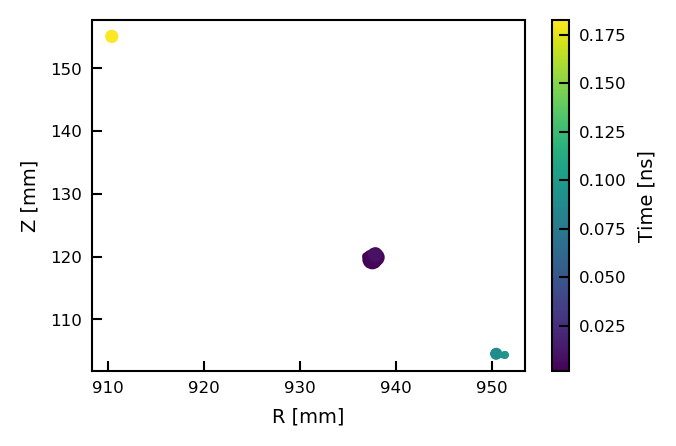

In [100]:
eventid=1

plt.scatter((np.sqrt(df.xp[eventid]**2+df.yp[eventid]**2)), df.zp[eventid], c=df.time[eventid]*1e9, s=df.ed[eventid]/10)
plt.colorbar(label='Time [ns]')
plt.xlabel('R [mm]')
plt.ylabel('Z [mm]')
plt.draw()
plt.show()

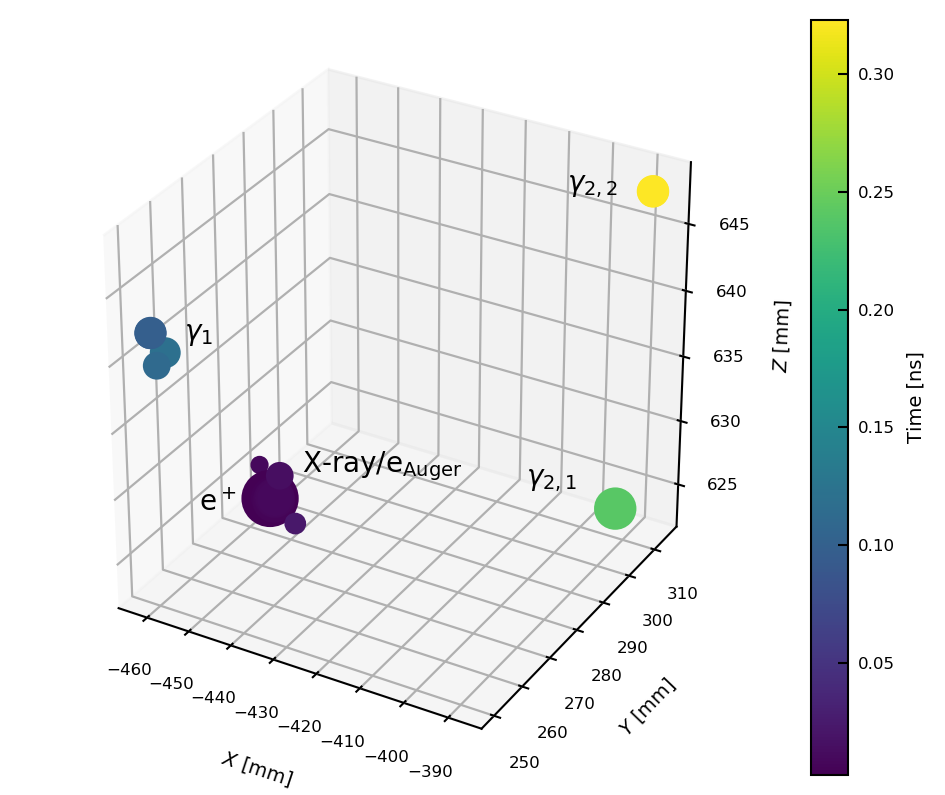

In [158]:
matplotlib.rcParams['figure.figsize'] = (6, 5)
from mpl_toolkits.mplot3d import Axes3D  


#for eventid in np.arange(0,20,1):
#print(eventid)
eventid=9

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#p=ax.scatter(df.xp[eventid], df.yp[eventid], df.zp[eventid], marker='o', c=df.time[eventid]*1e9, s=df.ed[eventid], alpha=1, norm=matplotlib.colors.LogNorm())
p=ax.scatter(df.xp[eventid], df.yp[eventid], df.zp[eventid], marker='o', c=df.time[eventid]*1e9, s=df.ed[eventid], alpha=1)
ax.text(-460,260,640, '$\\gamma_1$', fontsize=10)
ax.text(-410,305,625, '$\\gamma_{2,1}$', fontsize=10)
ax.text(-405,310,647, '$\\gamma_{2,2}$', fontsize=10)
ax.text(-440,270,630, 'X-ray/$\\rm{e}_{\\rm{Auger}}$', fontsize=10)
ax.text(-450,250,630, '$\\rm{e}^+$', fontsize=10)





fig.colorbar(p, label='Time [ns]', )

ax.set_xlabel('$X$ [mm]')
ax.set_ylabel('$Y$ [mm]')
ax.set_zlabel('$Z$ [mm]')

#    ax.set_xlim(900,950)
#    ax.set_ylim(75,125)
#ax.view_init(45, 45)

plt.draw()
plt.savefig('3d_%s.png'%(_decayname), transparent=True, bbox_inches='tight')
plt.show()

In [102]:
print(df.type[eventid])

[b'gamma', b'e-', b'e-', b'e+', b'e+', b'e+', b'e+', b'e+', b'e+', b'e+', b'e+', b'e+', b'e+', b'gamma', b'gamma', b'gamma', b'gamma', b'gamma', b'gamma', b'gamma', b'gamma', b'gamma', b'gamma', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-', b'e-']


In [103]:
esum_late=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] > 0.02e-9:
        esum_late+=pair[1]
        
print(esum_late)

esum_early=0
for pair in zip(np.array(df.iloc[eventid]['time']),np.array(df.iloc[eventid]['ed'])):
    if pair[0] < 0.02e-9:
        esum_early+=pair[1]
        
print(esum_early)

print(esum_early+esum_late)

1021.9978284239769
1834.7304348945618
2856.7282633185387


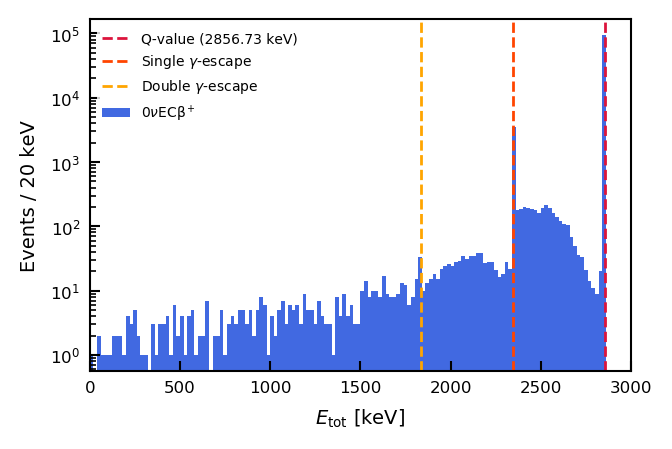

In [118]:
matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)


plt.hist(df.etot,range=(0,2900),bins=145, label='$0\\nu\\rm{EC}\\beta^+$', color='royalblue', alpha=1, zorder=0)
plt.xlabel('$E_{\\rm{tot}}$ [keV]')
plt.ylabel('Events / 20 keV')
plt.axvline(2856.73, linestyle='--', color='crimson', linewidth=1, label='Q-value (2856.73 keV)')
plt.axvline(2856.73-511, linestyle='--', color='orangered', linewidth=1, label='Single $\\gamma$-escape')
plt.axvline(2856.73-1022, linestyle='--', color='orange', linewidth=1, label='Double $\\gamma$-escape')
#plt.axvline(2856.73-1533, linestyle='--', color='orange', linewidth=1, label='Triple $\\gamma$-escape')




#plt.axvline(64.33, linestyle='--', color='purple', linewidth=1, label='Atomic deexcitation (64.33 keV)')
#plt.axvline(1086.33, linestyle='--', color='purple', linewidth=1, label='Atomic deexcitation\n+ positron (1086 keV)')


#plt.axvline(2188+64.33, linestyle='--', color='orange', linewidth=1, label='Excited nuclear states + atomic deexcitation')
#plt.axvline(603+64.33, linestyle='--', color='orange', linewidth=1)
#plt.axvline(1465+64.33, linestyle='--', color='orange', linewidth=1)
#plt.axvline(723+64.33, linestyle='--', color='orange', linewidth=1)
#plt.axvline(1326+64.33, linestyle='--', color='orange', linewidth=1)
#plt.axvline(752+64.33, linestyle='--', color='orange', linewidth=1)
#plt.axvline(1437+64.33, linestyle='--', color='orange', linewidth=1)
#plt.axvline(2039+64.33, linestyle='--', color='orange', linewidth=1)

plt.yscale('log')
plt.xlim(0,3000)
leg=plt.legend(loc='upper left')
leg.get_frame().set_linewidth(0)
plt.draw()
plt.savefig(_decayname+'_etot.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [105]:
for pair in zip(df.trackid[eventid], df.type[eventid], df.parentid[eventid]):
    print(pair)

(2, b'gamma', 0)
(3, b'e-', 2)
(3, b'e-', 2)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(1, b'e+', 0)
(6, b'gamma', 1)
(6, b'gamma', 1)
(6, b'gamma', 1)
(10, b'gamma', 6)
(5, b'gamma', 1)
(5, b'gamma', 1)
(5, b'gamma', 1)
(5, b'gamma', 1)
(15, b'gamma', 5)
(4, b'gamma', 1)
(17, b'e-', 4)
(17, b'e-', 4)
(17, b'e-', 4)
(16, b'e-', 15)
(16, b'e-', 15)
(14, b'e-', 5)
(14, b'e-', 5)
(14, b'e-', 5)
(14, b'e-', 5)
(13, b'e-', 5)
(13, b'e-', 5)
(12, b'e-', 5)
(12, b'e-', 5)
(11, b'e-', 10)
(11, b'e-', 10)
(9, b'e-', 6)
(9, b'e-', 6)
(8, b'e-', 6)
(8, b'e-', 6)
(7, b'e-', 6)
(7, b'e-', 6)
(7, b'e-', 6)
(7, b'e-', 6)
